 # Customer Churn Prediction for GNB Bank

## Introduction:

GNB Bank is a leading financial institution, providing various banking and financial services to its customers. As with any bank, customer retention is crucial for maintaining a strong market presence and sustaining profitability. Identifying customers who are likely to churn is of paramount importance for GNB Bank to implement targeted strategies and retain valuable customers. In this notebook, we will explore a dataset containing customer information, including demographics, banking behavior, and historical churn data. Our objective is to build a predictive model that can accurately predict customer churn and provide valuable insights to help GNB Bank enhance its customer retention efforts.

## Business Understanding:

For GNB Bank, understanding and predicting customer churn is critical for several reasons. First and foremost, customer churn impacts the bank's revenue and profitability. Acquiring new customers is more expensive than retaining existing ones, so preventing churn can lead to significant cost savings. Moreover, customer retention contributes to a positive reputation and strengthens the bank's position in the highly competitive financial industry. By leveraging machine learning techniques to predict customer churn, GNB Bank can proactively address the needs of at-risk customers, personalize their banking experience, and develop targeted marketing campaigns to foster long-term customer loyalty.

## Problem Statement:

The goal of this project is to build an accurate customer churn prediction model for GNB Bank. Specifically, we aim to develop a machine learning model that can predict whether a customer is likely to churn or not based on their historical behavior and demographic information. The project involves the following tasks:

Exploratory Data Analysis (EDA): We will explore the dataset to gain insights into customer demographics, banking behavior, and the distribution of churned customers. EDA will help us understand the data and identify patterns that may be indicative of churn.

Data Preprocessing: We will handle missing values, encode categorical variables, and perform feature scaling to prepare the data for model training.

Feature Importance Analysis: Using SHAP (SHapley Additive exPlanations), we will identify the most important features that influence customer churn for GNB Bank.

Model Building: We will train and evaluate two machine learning models - Decision Trees and Random Forests - to predict customer churn accurately.

Model Evaluation: The performance of the models will be assessed using various evaluation metrics, such as accuracy, F1 score, precision, recall, and the ROC-AUC curve.

Interpretation and Recommendations: We will interpret the model results to identify key factors contributing to customer churn for GNB Bank. Based on the insights gained, we will provide actionable recommendations to the bank on strategies to reduce churn and improve customer retention.

By completing these tasks, we aim to deliver a robust customer churn prediction model that will enable GNB Bank to make data-driven decisions, enhance customer satisfaction, and strengthen its market position in the competitive financial industry.

**1.RowNumber:** A sequential number assigned to each row in the dataset.

**2.CustomerId:** A unique identifier for each customer in the bank.

**3.Surname:** The last name of the customer.

**4.CreditScore:** The credit score of the customer, representing their creditworthiness.

**5.Geography:** The geographical location of the customer (e.g., France, Spain, Germany).

**6.Gender:** The gender of the customer (Male or Female).

**7.Age:** The age of the customer.

**8.Tenure:** The number of years the customer has been with the bank.

**9.Balance:** The account balance of the customer.

**10.NumOfProducts:** The number of bank products the customer has purchased.

**11.HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).

**12.IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).

**13.EstimatedSalary:** The estimated salary of the customer.

**14.Exited:** The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 1. Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data

In [8]:
df = pd.read_csv("Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


This dataset has 14 columns; 3 categorical, 11 numerical and 10000 rows/observations. The data doesn't seem to have any missing values. To understand the data better, let's check the value counts of each column.

In [10]:
def check_value_counts(data):
  for column in data.columns:
    print(f'value counts for {column}')
    print(data[column].value_counts())
    print('------------------------------------------','\n')

check_value_counts(df)

value counts for RowNumber
2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64
------------------------------------------ 

value counts for CustomerId
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
------------------------------------------ 

value counts for Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Bancroft     1
Stiger       1
Kepley       1
Astorga      1
Kershaw      1
Name: Surname, Length: 2932, dtype: int64
------------------------------------------ 

value counts for CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
----------------------------

The data doesn't have data any inconsistencies.

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


As seen above, the data is in different scales thus for modelling processes, we'll have toscale the data to be in the same scale.

## 3. Data Analysis

In [13]:
# checking for missing values and duplicates
def check_missing_values(data):
  return data.isna().sum()

def check_duplicates (data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates

In [14]:
check_duplicates(df)

0

In [15]:
check_missing_values(df)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The data has neither duplicates nor missing values.

In [16]:
#Since CustomerId is the unique identifier of the customers, let's check for duplicates
duplicated_number= df[df['CustomerId'].duplicated(keep=False)]
duplicated_number

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


The column CustomerId doesn't have any duplicates

### 4. Outliers

IQR for RowNumber column: 4999.5
Number of outliers in RowNumber column: 0
IQR for CustomerId column: 124705.5
Number of outliers in CustomerId column: 0
IQR for CreditScore column: 134.0
Number of outliers in CreditScore column: 15
IQR for Age column: 12.0
Number of outliers in Age column: 359
IQR for Tenure column: 4.0
Number of outliers in Tenure column: 0
IQR for Balance column: 127644.24
Number of outliers in Balance column: 0
IQR for NumOfProducts column: 1.0
Number of outliers in NumOfProducts column: 60
IQR for HasCrCard column: 1.0
Number of outliers in HasCrCard column: 0
IQR for IsActiveMember column: 1.0
Number of outliers in IsActiveMember column: 0
IQR for EstimatedSalary column: 98386.1375
Number of outliers in EstimatedSalary column: 0
IQR for Exited column: 0.0
Number of outliers in Exited column: 2037


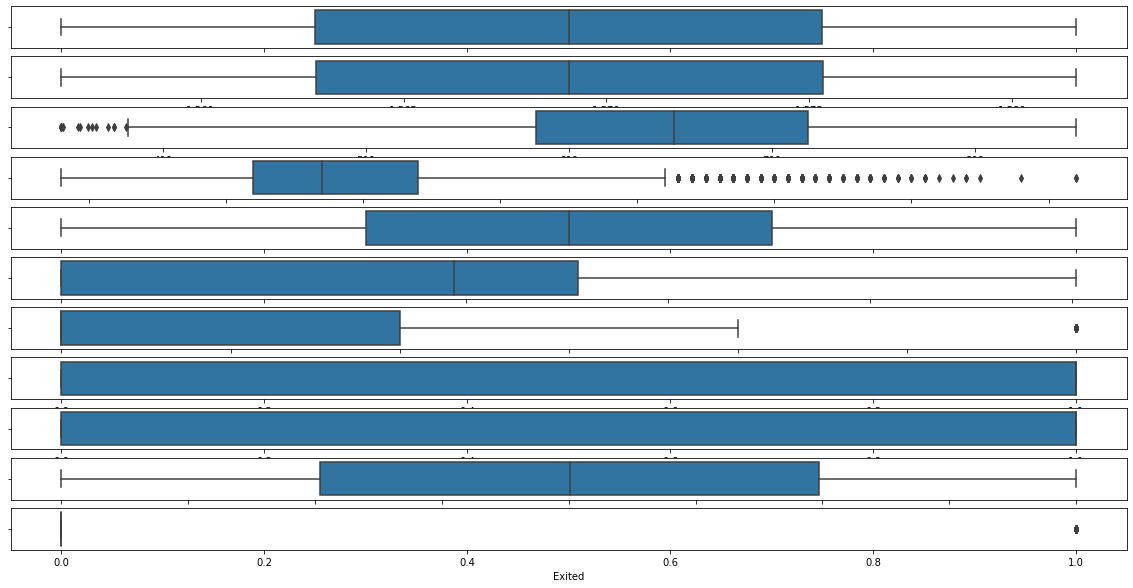

In [17]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,10))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()


num=df.select_dtypes('number')
columns=num.columns
check_outliers(df, columns)

The data has outliers but we won't remove them because that information could be useful to predict customer churn.

## 5. Univariate EDA

Let's understand the target variable better, 7963 customers did not churn but 2037 customers did churn(this shows that our data has class imbalance problems so we should put this into consideration when modelling).

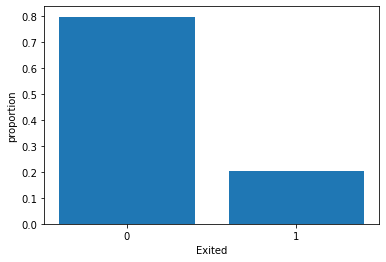

In [24]:
d= df.Exited.value_counts(normalize=True)
plt.bar(d.index, d.values)
plt.xlabel('Exited')
plt.ylabel('proportion')
plt.xticks([0, 1])
plt.show();

The above plot shows the distribution of our target variable and we can see that most of the customers did not churn. Let's visualize the distribution of our predicor variables.

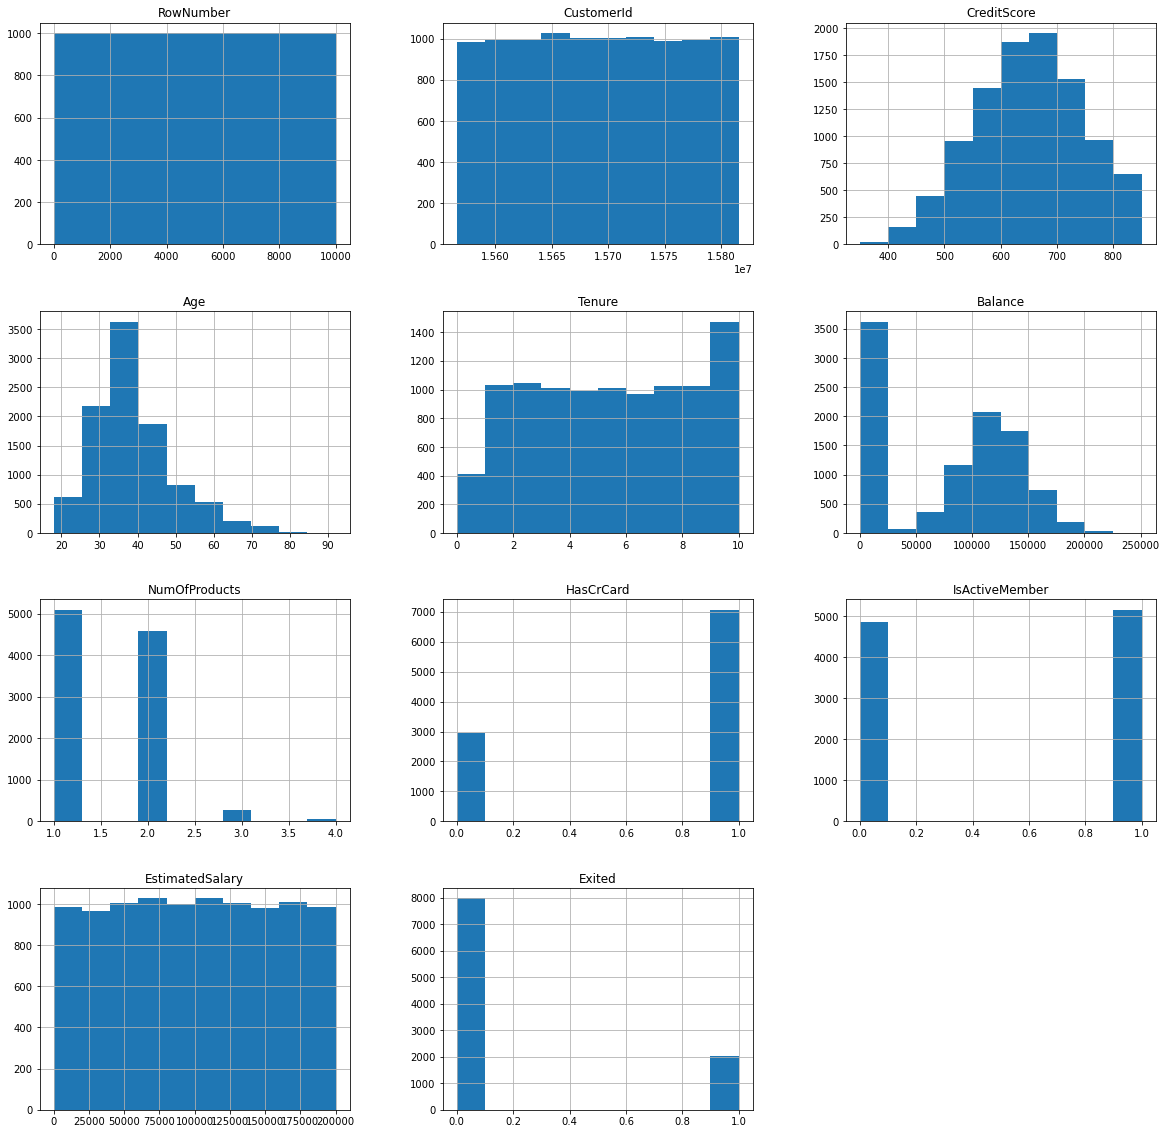

In [26]:
# distribution of numerical predictors
df.hist(figsize=(20,20));

The predictor variables; account
